In [17]:
import c3d
import os
import itertools
import matplotlib.pyplot as plt


In [18]:
key_name = 'p1s1'
sample_c3d_path = f'gait3d\\Sequences\\{key_name}\\MoCap\\{key_name}.c3d'
markers_number = 39
frames_per_sec = 100

In [19]:
import json
from scripts.parsers import parse_sequences

file_path = 'gait3d\\ListOfSequences.txt'
sequences = parse_sequences(file_path)
print(json.dumps(sequences, indent=4))

{
    "p1s1": {
        "start_frame": 195,
        "number_of_frames": 135,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p1s2": {
        "start_frame": 150,
        "number_of_frames": 120,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p1s3": {
        "start_frame": 435,
        "number_of_frames": 130,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p1s4": {
        "start_frame": 350,
        "number_of_frames": 110,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p2s1": {
        "start_frame": 130,
        "number_of_frames": 155,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p2s2": {
        "start_frame": 110,
        "number_of_frames": 120,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p2s3": {
        "start_frame": 330,
        "number_of_frames": 125,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p2s4": {
        "start_frame": 285,
    

In [20]:
sequences[key_name]

{'start_frame': 195,
 'number_of_frames': 135,
 'frame_offset': 0,
 'MoCap_data': True}

In [21]:
with open(sample_c3d_path, 'rb') as handle:
    reader = c3d.Reader(handle)
    frame = next(itertools.islice(reader.read_frames(), sequences[key_name]['start_frame'], None))
    print(frame[1][:markers_number])

[[ -25.013208   670.7112    1563.7917       0.           0.       ]
 [-148.86043    678.4454    1574.7402       0.           0.       ]
 [   1.6547322  773.6731    1537.0735       0.           0.       ]
 [-155.83627    800.6085    1555.9517       0.           0.       ]
 [ -87.53709    873.5129    1350.5795       0.           0.       ]
 [ -93.54805    893.19086   1166.0433       0.           0.       ]
 [ -87.328896   717.80194   1287.54         0.           0.       ]
 [ -86.06481    671.35486   1147.3452       0.           0.       ]
 [-156.59387    908.7301    1269.8665       0.           0.       ]
 [  40.75662    819.75415   1378.4326       0.           0.       ]
 [ 189.82523    853.34515   1290.156        0.           0.       ]
 [ 307.81345    840.56396   1255.1793       0.           0.       ]
 [ 410.3478     853.36163   1239.6923       0.           0.       ]
 [ 539.3733     799.9082    1214.4846       0.           0.       ]
 [ 527.7483     864.841     1205.7786       0.  

In [22]:
print(f"{len(frame) = }")
print(f"{type(frame[1]) = }")
print(f"{frame[1].shape = }")
print(f"{frame[1][:5] = }")

len(frame) = 3
type(frame[1]) = <class 'numpy.ndarray'>
frame[1].shape = (191, 5)
frame[1][:5] = array([[ -25.013208 ,  670.7112   , 1563.7917   ,    0.       ,
           0.       ],
       [-148.86043  ,  678.4454   , 1574.7402   ,    0.       ,
           0.       ],
       [   1.6547322,  773.6731   , 1537.0735   ,    0.       ,
           0.       ],
       [-155.83627  ,  800.6085   , 1555.9517   ,    0.       ,
           0.       ],
       [ -87.53709  ,  873.5129   , 1350.5795   ,    0.       ,
           0.       ]], dtype=float32)


In [23]:
frame[1].shape

(191, 5)

In [24]:
frame[1]

array([[-2.50132084e+01,  6.70711182e+02,  1.56379175e+03,
         0.00000000e+00,  0.00000000e+00],
       [-1.48860428e+02,  6.78445374e+02,  1.57474023e+03,
         0.00000000e+00,  0.00000000e+00],
       [ 1.65473223e+00,  7.73673096e+02,  1.53707349e+03,
         0.00000000e+00,  0.00000000e+00],
       [-1.55836273e+02,  8.00608521e+02,  1.55595166e+03,
         0.00000000e+00,  0.00000000e+00],
       [-8.75370865e+01,  8.73512878e+02,  1.35057947e+03,
         0.00000000e+00,  0.00000000e+00],
       [-9.35480499e+01,  8.93190857e+02,  1.16604333e+03,
         0.00000000e+00,  0.00000000e+00],
       [-8.73288956e+01,  7.17801941e+02,  1.28754004e+03,
         0.00000000e+00,  0.00000000e+00],
       [-8.60648117e+01,  6.71354858e+02,  1.14734521e+03,
         0.00000000e+00,  0.00000000e+00],
       [-1.56593872e+02,  9.08730103e+02,  1.26986646e+03,
         0.00000000e+00,  0.00000000e+00],
       [ 4.07566185e+01,  8.19754150e+02,  1.37843262e+03,
         0.00000000e+00

In [25]:
frame

(196,
 array([[-2.50132084e+01,  6.70711182e+02,  1.56379175e+03,
          0.00000000e+00,  0.00000000e+00],
        [-1.48860428e+02,  6.78445374e+02,  1.57474023e+03,
          0.00000000e+00,  0.00000000e+00],
        [ 1.65473223e+00,  7.73673096e+02,  1.53707349e+03,
          0.00000000e+00,  0.00000000e+00],
        [-1.55836273e+02,  8.00608521e+02,  1.55595166e+03,
          0.00000000e+00,  0.00000000e+00],
        [-8.75370865e+01,  8.73512878e+02,  1.35057947e+03,
          0.00000000e+00,  0.00000000e+00],
        [-9.35480499e+01,  8.93190857e+02,  1.16604333e+03,
          0.00000000e+00,  0.00000000e+00],
        [-8.73288956e+01,  7.17801941e+02,  1.28754004e+03,
          0.00000000e+00,  0.00000000e+00],
        [-8.60648117e+01,  6.71354858e+02,  1.14734521e+03,
          0.00000000e+00,  0.00000000e+00],
        [-1.56593872e+02,  9.08730103e+02,  1.26986646e+03,
          0.00000000e+00,  0.00000000e+00],
        [ 4.07566185e+01,  8.19754150e+02,  1.37843262e+03

In [26]:
frame[0]

196

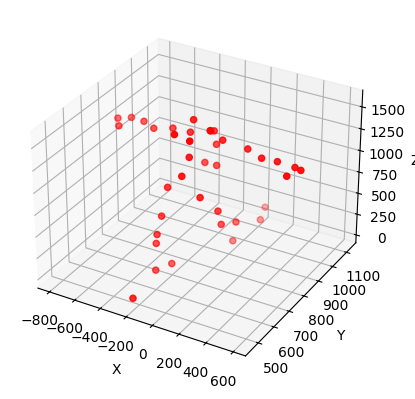

In [27]:
x = frame[1][:markers_number, 0]
y = frame[1][:markers_number, 1]
z = frame[1][:markers_number, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [28]:
frame[0]

196

In [32]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=5, color='blue'))])

fig.update_layout(scene=dict(
                        xaxis_title='X',
                        yaxis_title='Y',
                        zaxis_title='Z',
                        xaxis=dict(range=[-1000, 1000]),
                        yaxis=dict(range=[-600, 1400]),
                        zaxis=dict(range=[-0, 2000]),
                        aspectmode='cube', 
                    ),
                    title=f'3D joints plot from C3D file ({frame[0]} frame, {key_name} sequence)',
                    width=800,
                    height=600,
                    )

fig.show()

In [12]:
with open(sample_c3d_path, 'rb') as handle:  
    reader = c3d.Reader(handle)
    frame_num = sum([1 for _ in reader.read_frames()])
    print(f"{frame_num = }")
    
    for frame in reader.read_frames():
        print(f"{frame[0]} {frame[1].shape} {frame[2].shape}")

C:\Users\Miko7\Studia\magisterka\gait-features-identification\venv\lib\site-packages\c3d\c3d.py:1219: UserWarning:

No analog data found in file.



frame_num = 3187
1 (191, 5) (0,)
2 (191, 5) (0,)
3 (191, 5) (0,)
4 (191, 5) (0,)
5 (191, 5) (0,)
6 (191, 5) (0,)
7 (191, 5) (0,)
8 (191, 5) (0,)
9 (191, 5) (0,)
10 (191, 5) (0,)
11 (191, 5) (0,)
12 (191, 5) (0,)
13 (191, 5) (0,)
14 (191, 5) (0,)
15 (191, 5) (0,)
16 (191, 5) (0,)
17 (191, 5) (0,)
18 (191, 5) (0,)
19 (191, 5) (0,)
20 (191, 5) (0,)
21 (191, 5) (0,)
22 (191, 5) (0,)
23 (191, 5) (0,)
24 (191, 5) (0,)
25 (191, 5) (0,)
26 (191, 5) (0,)
27 (191, 5) (0,)
28 (191, 5) (0,)
29 (191, 5) (0,)
30 (191, 5) (0,)
31 (191, 5) (0,)
32 (191, 5) (0,)
33 (191, 5) (0,)
34 (191, 5) (0,)
35 (191, 5) (0,)
36 (191, 5) (0,)
37 (191, 5) (0,)
38 (191, 5) (0,)
39 (191, 5) (0,)
40 (191, 5) (0,)
41 (191, 5) (0,)
42 (191, 5) (0,)
43 (191, 5) (0,)
44 (191, 5) (0,)
45 (191, 5) (0,)
46 (191, 5) (0,)
47 (191, 5) (0,)
48 (191, 5) (0,)
49 (191, 5) (0,)
50 (191, 5) (0,)
51 (191, 5) (0,)
52 (191, 5) (0,)
53 (191, 5) (0,)
54 (191, 5) (0,)
55 (191, 5) (0,)
56 (191, 5) (0,)
57 (191, 5) (0,)
58 (191, 5) (0,)
59 (19

In [13]:
import plotly.graph_objects as go
import numpy as np
import c3d
import itertools

with open(sample_c3d_path, 'rb') as handle:
    reader = c3d.Reader(handle)
    first_frame = next(itertools.islice(reader.read_frames(), sequences[key_name]['start_frame']*4, None)) # mult by 4 because of 100 vs 25 Hz

fig = go.Figure(
    data=[go.Scatter3d(
        x=first_frame[1][:markers_number, 0],
        y=first_frame[1][:markers_number, 1], 
        z=first_frame[1][:markers_number, 2], 
        mode='markers',
        marker=dict(size=4, color='blue'))]
)

with open(sample_c3d_path, 'rb') as handle:
    reader = c3d.Reader(handle)
    frames = [go.Frame(
        data=[go.Scatter3d(
            x=curr_frame[1][:markers_number, 0],
            y=curr_frame[1][:markers_number, 1],
            z=curr_frame[1][:markers_number, 2],
            mode='markers',
            marker=dict(size=4, color='blue'))],
        name=f'frame {i}',
        layout=go.Layout(
            annotations=[dict(
                text=f'Frame {i+1}',
                x=0.05, y=0.95, xref='paper', yref='paper',
                showarrow=False, font=dict(size=16, color="black"))]
        )
    ) for i, curr_frame in enumerate(reader.read_frames())]

    fig.frames = frames[sequences[key_name]['start_frame']*4:]
    
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            xaxis=dict(range=[-1000, 1000]),
            yaxis=dict(range=[-3500, 3500]),
            zaxis=dict(range=[0, 2000]),
            aspectmode='manual',
            aspectratio=dict(x=2, y=7, z=2)
        ),
        title='3D Gait Animation from C3D File',
        width=800,
        height=600,
        annotations=[dict(
            text='Frame 1',
            x=0.05, y=0.95, xref='paper', yref='paper',
            showarrow=False, font=dict(size=16, color="black"))],
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, dict(frame=dict(duration=1000/frames_per_sec, redraw=True), fromcurrent=True)])]
        )]
    )

    fig.show()
